In [3]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

def train_and_save_model(stock_name, stock_data, sequence_length=60, epochs=10):
    # Scale only the 'Close' column
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(stock_data[['Close']])

    # Prepare sequences of closing prices for LSTM model
    x_train, y_train = [], []

    for i in range(sequence_length, len(scaled_data)):
        x_train.append(scaled_data[i-sequence_length:i, 0])  # Use only 'Close' price
        y_train.append(scaled_data[i, 0])  # Target is the 'Close' price

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))  # Reshape for LSTM

    # Define the model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])

    # Compile and train the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=1, epochs=epochs)

    # Save the model with the stock's name
    model.save(f'models/{stock_name}/{stock_name}.h5')

# Example for TSLA
excel_data = pd.read_excel('historical_prices.xlsx', sheet_name=None)

for stock_name, stock_data in excel_data.items():
    print(f'Training model for {stock_name} ...')
    train_and_save_model(stock_name, stock_data)


Training model for TSLA ...
Epoch 1/10


/Users/brianerichsenfagundes/Desktop/6017/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1118/1118 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0149
Epoch 2/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0029
Epoch 3/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0027
Epoch 4/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0022
Epoch 5/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0018
Epoch 6/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0021
Epoch 7/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0019
Epoch 8/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0016
Epoch 9/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0015
Epoch 10/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0015


Training model for MSFT ...
Epoch 1/10


/Users/brianerichsenfagundes/Desktop/6017/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1118/1118 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0155
Epoch 2/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0030
Epoch 3/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0021
Epoch 4/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0014
Epoch 5/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0015
Epoch 6/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0014
Epoch 7/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0014
Epoch 8/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0015
Epoch 9/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0013
Epoch 10/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0013


Training model for GOOG ...
Epoch 1/10


/Users/brianerichsenfagundes/Desktop/6017/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1118/1118 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0152
Epoch 2/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0022
Epoch 3/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0026
Epoch 4/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0016
Epoch 5/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0016
Epoch 6/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0018
Epoch 7/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0014
Epoch 8/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0015
Epoch 9/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0014
Epoch 10/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0013


Training model for AAPL ...
Epoch 1/10


/Users/brianerichsenfagundes/Desktop/6017/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1118/1118 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0138
Epoch 2/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0021
Epoch 3/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0019
Epoch 4/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0015
Epoch 5/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0014
Epoch 6/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 220s 197ms/step - loss: 0.0014
Epoch 7/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0017
Epoch 8/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0012
Epoch 9/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0014
Epoch 10/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0015


Training model for S&P 500 ...
Epoch 1/10


/Users/brianerichsenfagundes/Desktop/6017/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1118/1118 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0185
Epoch 2/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0021
Epoch 3/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0014
Epoch 4/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0016
Epoch 5/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0016
Epoch 6/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0015
Epoch 7/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0013
Epoch 8/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0013
Epoch 9/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0015
Epoch 10/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0011


In [5]:
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

def predict_next_day_individual(stock_data, stock_name, sequence_length=60):
    # Load the model specific to the stock
    model = load_model(f'models/{stock_name}/{stock_name}.h5')
    
    # Scale the 'Close' feature for prediction
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(stock_data[['Close']])
    
    # Prepare the input sequence for prediction (last 60 days of stock data)
    last_60_days_scaled = scaled_data[-sequence_length:]
    x_input = np.reshape(last_60_days_scaled, (1, sequence_length, 1))  # Reshape for LSTM input
    
    # Predict the next day price
    predicted_stock_price = model.predict(x_input)
    predicted_price = scaler.inverse_transform([[predicted_stock_price[0][0]]])[0][0]  # Inverse transform to get original scale

    return predicted_price

# Testing
excel_data = pd.read_excel('historical_prices.xlsx', sheet_name=None)

for stock_name, stock_data in excel_data.items():
    # Predicting the next day price for TSLA
    predicted_price = predict_next_day_individual(stock_data, stock_name)
    print(f'Predicted next day price for {stock_name}: {predicted_price:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Predicted next day price for TSLA: 218.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Predicted next day price for MSFT: 398.18
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Predicted next day price for GOOG: 153.98


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Predicted next day price for AAPL: 222.07


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Predicted next day price for S&P 500: 5600.18


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Mean Absolute Error (MAE): 6.7649
Mean Squared Error (MSE): 86.6351


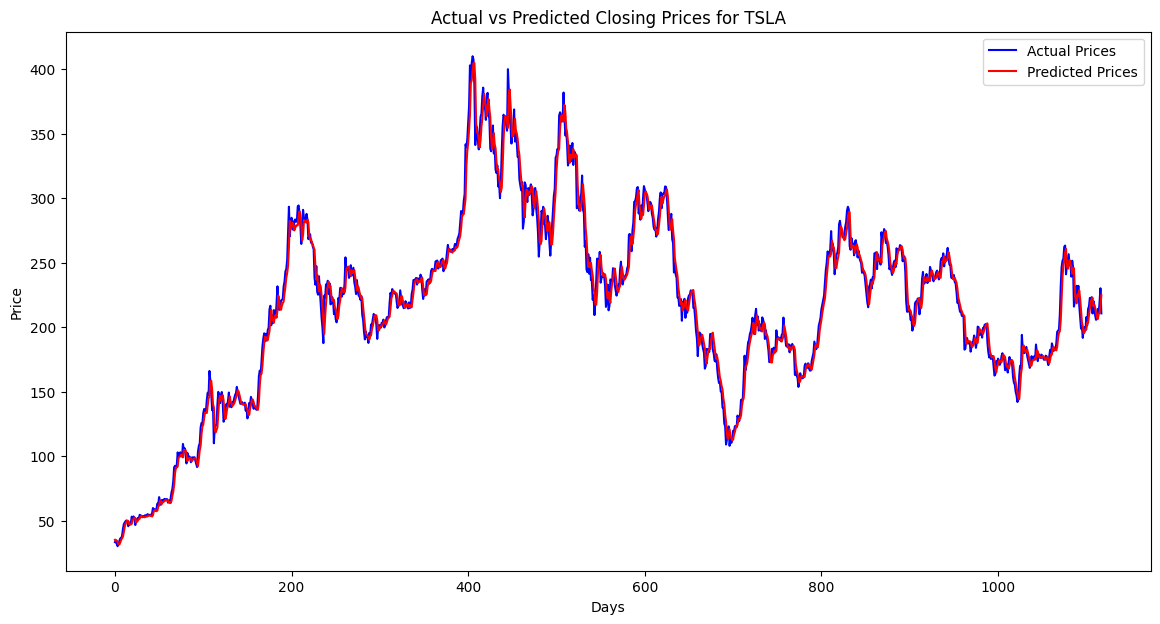

In [10]:
import warnings

from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

stock_name = 'TSLA'
test_data = excel_data[stock_name]
sequence_length = 60
actual_prices = test_data['Close'].values
predicted_prices = []

warnings.filterwarnings('ignore')

for i in range(len(actual_prices) - sequence_length):
    subset = test_data.iloc[i:i + sequence_length]
    predicted_price = predict_next_day_individual(subset, stock_name, sequence_length)
    predicted_prices.append(predicted_price)

actual_prices = actual_prices[sequence_length:]


mae = mean_absolute_error(actual_prices[:len(predicted_prices)], predicted_prices)
mse = mean_squared_error(actual_prices[:len(predicted_prices)], predicted_prices)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')

# Plotting actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(actual_prices[:len(predicted_prices)], label='Actual Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', color='red')
plt.title(f'Actual vs Predicted Closing Prices for {stock_name}')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

Mean Absolute Error (MAE): 6.7649
Mean Squared Error (MSE): 86.6351


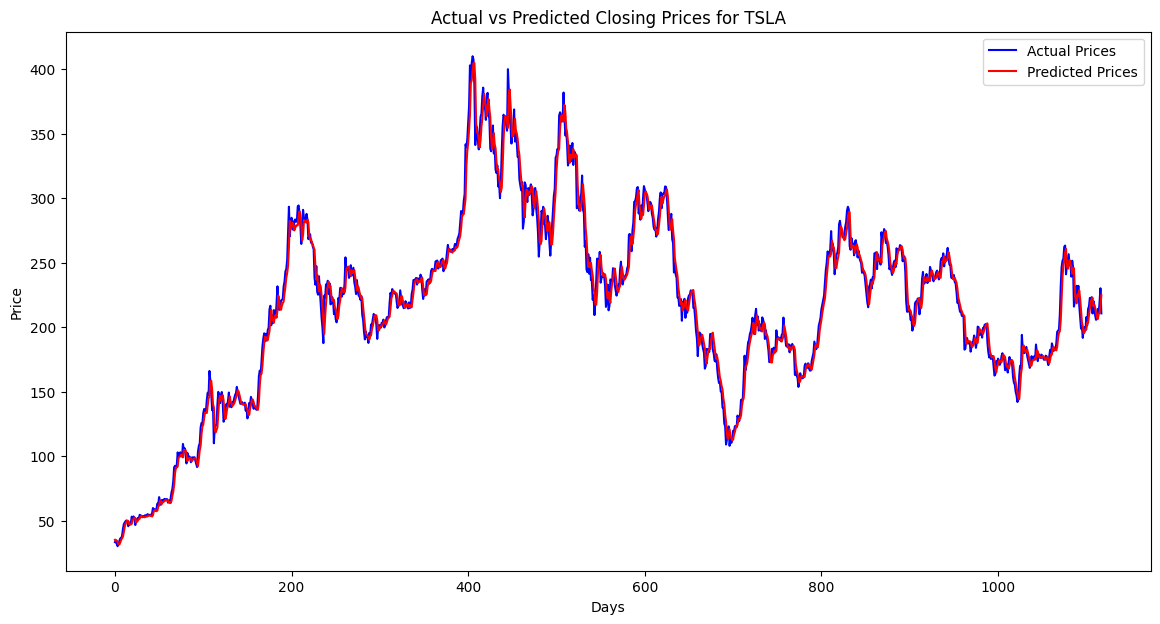

In [9]:
mae = mean_absolute_error(actual_prices[:len(predicted_prices)], predicted_prices)
mse = mean_squared_error(actual_prices[:len(predicted_prices)], predicted_prices)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')

# Plotting actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(actual_prices[:len(predicted_prices)], label='Actual Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', color='red')
plt.title(f'Actual vs Predicted Closing Prices for {stock_name}')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()